**Install necessary dependencies**

In [ ]:
# Install necessary dependencies
!pip install torch torchvision
!pip install matplotlib
!pip install numpy

**Import libraries**

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision
from torchvision import transforms, datasets
from diffusers import StableDiffusionPipeline

In [3]:
# Load Stable Diffusion pipeline with GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Download the Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to(device)

print(f"Model loaded on: {device}")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded on: cuda


In [4]:
def generate_image(condition):
    """
    Generates an image based on the given condition using Stable Diffusion.

    Args:
        condition (str): A text, number, or token to condition the image generation.

    Returns:
        np.ndarray: The generated image as a NumPy array in HWC format (RGB).
    """
    # Generate the image based on the condition
    with torch.no_grad():
        generated_image = pipe(condition).images[0]  # Generate an image using the pipeline

    # Convert to NumPy for further processing if needed
    image_np = np.array(generated_image)
    return image_np

In [8]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations for MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images
    transforms.ToTensor(),       # Convert to PyTorch tensor
])

# Load MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_dataloader = DataLoader(mnist_dataset, batch_size=64, shuffle=True)

# Class labels for MNIST (digits 0-9)
mnist_classes = list(range(10))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.16MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



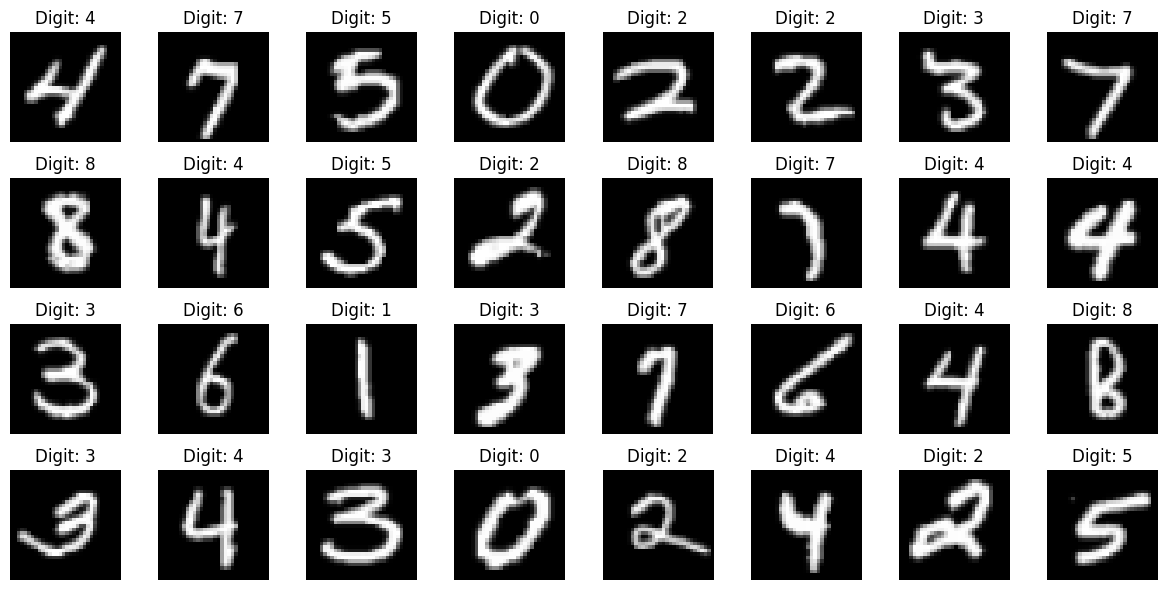

In [9]:
# Visualize MNIST images
def show_mnist_images(dataloader):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Digit: {label.item()}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display MNIST images
show_mnist_images(mnist_dataloader)

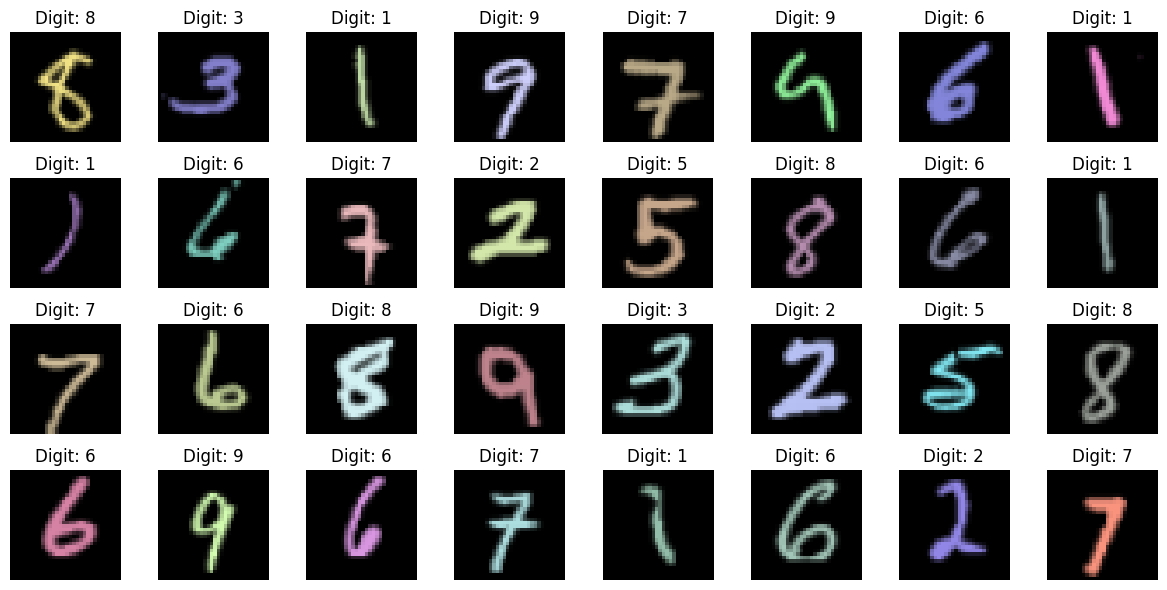

In [10]:
import numpy as np

# Simulate conditional coloring
def simulate_colored_images(images, labels):
    # Map grayscale images to RGB by applying random color scaling
    colored_images = []
    for img, label in zip(images, labels):
        img_rgb = torch.stack([
            img.squeeze() * torch.tensor(np.random.uniform(0.5, 1.0)),  # Red channel
            img.squeeze() * torch.tensor(np.random.uniform(0.5, 1.0)),  # Green channel
            img.squeeze() * torch.tensor(np.random.uniform(0.5, 1.0)),  # Blue channel
        ], dim=0)
        colored_images.append((img_rgb, label))

    return colored_images

# Create colored images
images, labels = next(iter(mnist_dataloader))
colored_images = simulate_colored_images(images, labels)

# Display colored images
def show_colored_images(colored_images):
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    axes = axes.flatten()

    for (img_rgb, label), ax in zip(colored_images, axes):
        img_rgb = img_rgb.permute(1, 2, 0)  # Rearrange dimensions for visualization
        ax.imshow(img_rgb.numpy())
        ax.set_title(f"Digit: {label.item()}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_colored_images(colored_images)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

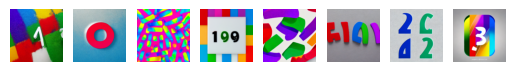

In [3]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

# Load MNIST dataset
transform = transforms.Compose([transforms.Resize((32, 32)),  # Resize images
                                transforms.ToTensor()])  # Convert to PyTorch tensor
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Extract the first batch of labels (or any other batch you want)
data_iter = iter(dataloader)
images, labels = next(data_iter)

# Generate colored images conditionally based on labels
def generate_colored_images_with_sd(labels):
    # Create detailed prompts to guide Stable Diffusion in generating colored images of digits
    prompts = [f"A realistic and colorful image of the digit {label} on a white background, high-quality, vibrant colors" for label in labels]
    generated_images = pipeline(prompts, num_inference_steps=500)
    return generated_images

# Example usage (generate images for first 8 labels)
labels = labels[:8].tolist()  # Take the first 8 labels for example
generated_images = generate_colored_images_with_sd(labels)

# Display generated images
for i, img in enumerate(generated_images["images"]):
    plt.subplot(1, len(labels), i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()